Generic importing of packages.

In [2]:
# From ChatGPT
import numpy as np

class Particle:
    def __init__(self, position, velocity, density, mass):
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.density = density
        self.mass = mass
        self.acceleration = np.zeros_like(self.position)
    
    def __repr__(self):
        return f"Particle(position={self.position}, velocity={self.velocity}, acceleration={self.acceleration}, density={self.density}, mass={self.mass})"

class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles
        self.G = 6.674e-11
    
    def update_accelerations(self):
        num_particles = len(self.particles)
        for i in range(num_particles):
            a = np.zeros_like(self.particles[i].position)
            for j in range(num_particles):
                if i == j:
                    continue
                r = self.particles[j].position - self.particles[i].position
                dist = np.linalg.norm(r)
                f = self.G * self.particles[i].mass * self.particles[j].mass / dist**2
                a += f / self.particles[i].mass * r / dist
            self.particles[i].acceleration = a
    
    def update_particles(self, dt=0.01):
        for particle in self.particles:
            particle.velocity += particle.acceleration * dt
            particle.position += particle.velocity * dt
    
    def simulate(self, num_steps, dt=0.01):
        for i in range(num_steps):
            self.update_accelerations()
            self.update_particles(dt)


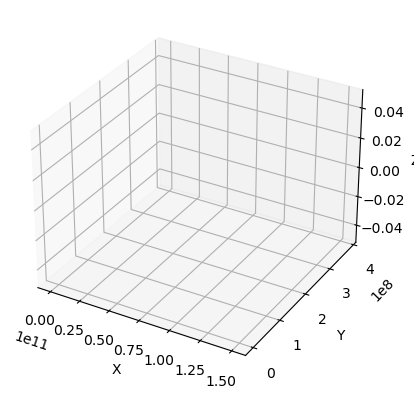

In [3]:
import matplotlib.pyplot as plt

# Define the particles
particles = [
    Particle(np.array([0, 0, 0]), np.array([0, 0, 0]), 1, 5.97e24),  # Earth
    Particle(np.array([1.5e11, 0, 0]), np.array([0, 30000, 0]), 0.001, 1.99e30),  # Sun
    Particle(np.array([1.5e11, 3.84e8, 0]), np.array([-10000, 30000, 0]), 0.001, 7.34e22),  # Moon
]

# Simulate the particles
simulator = ParticleSimulator(particles)
simulator.simulate(num_steps=10000)

# Plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for particle in particles:
    ax.plot(particle.position.T[0], particle.position.T[1], particle.position.T[2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


<IPython.core.display.Javascript object>


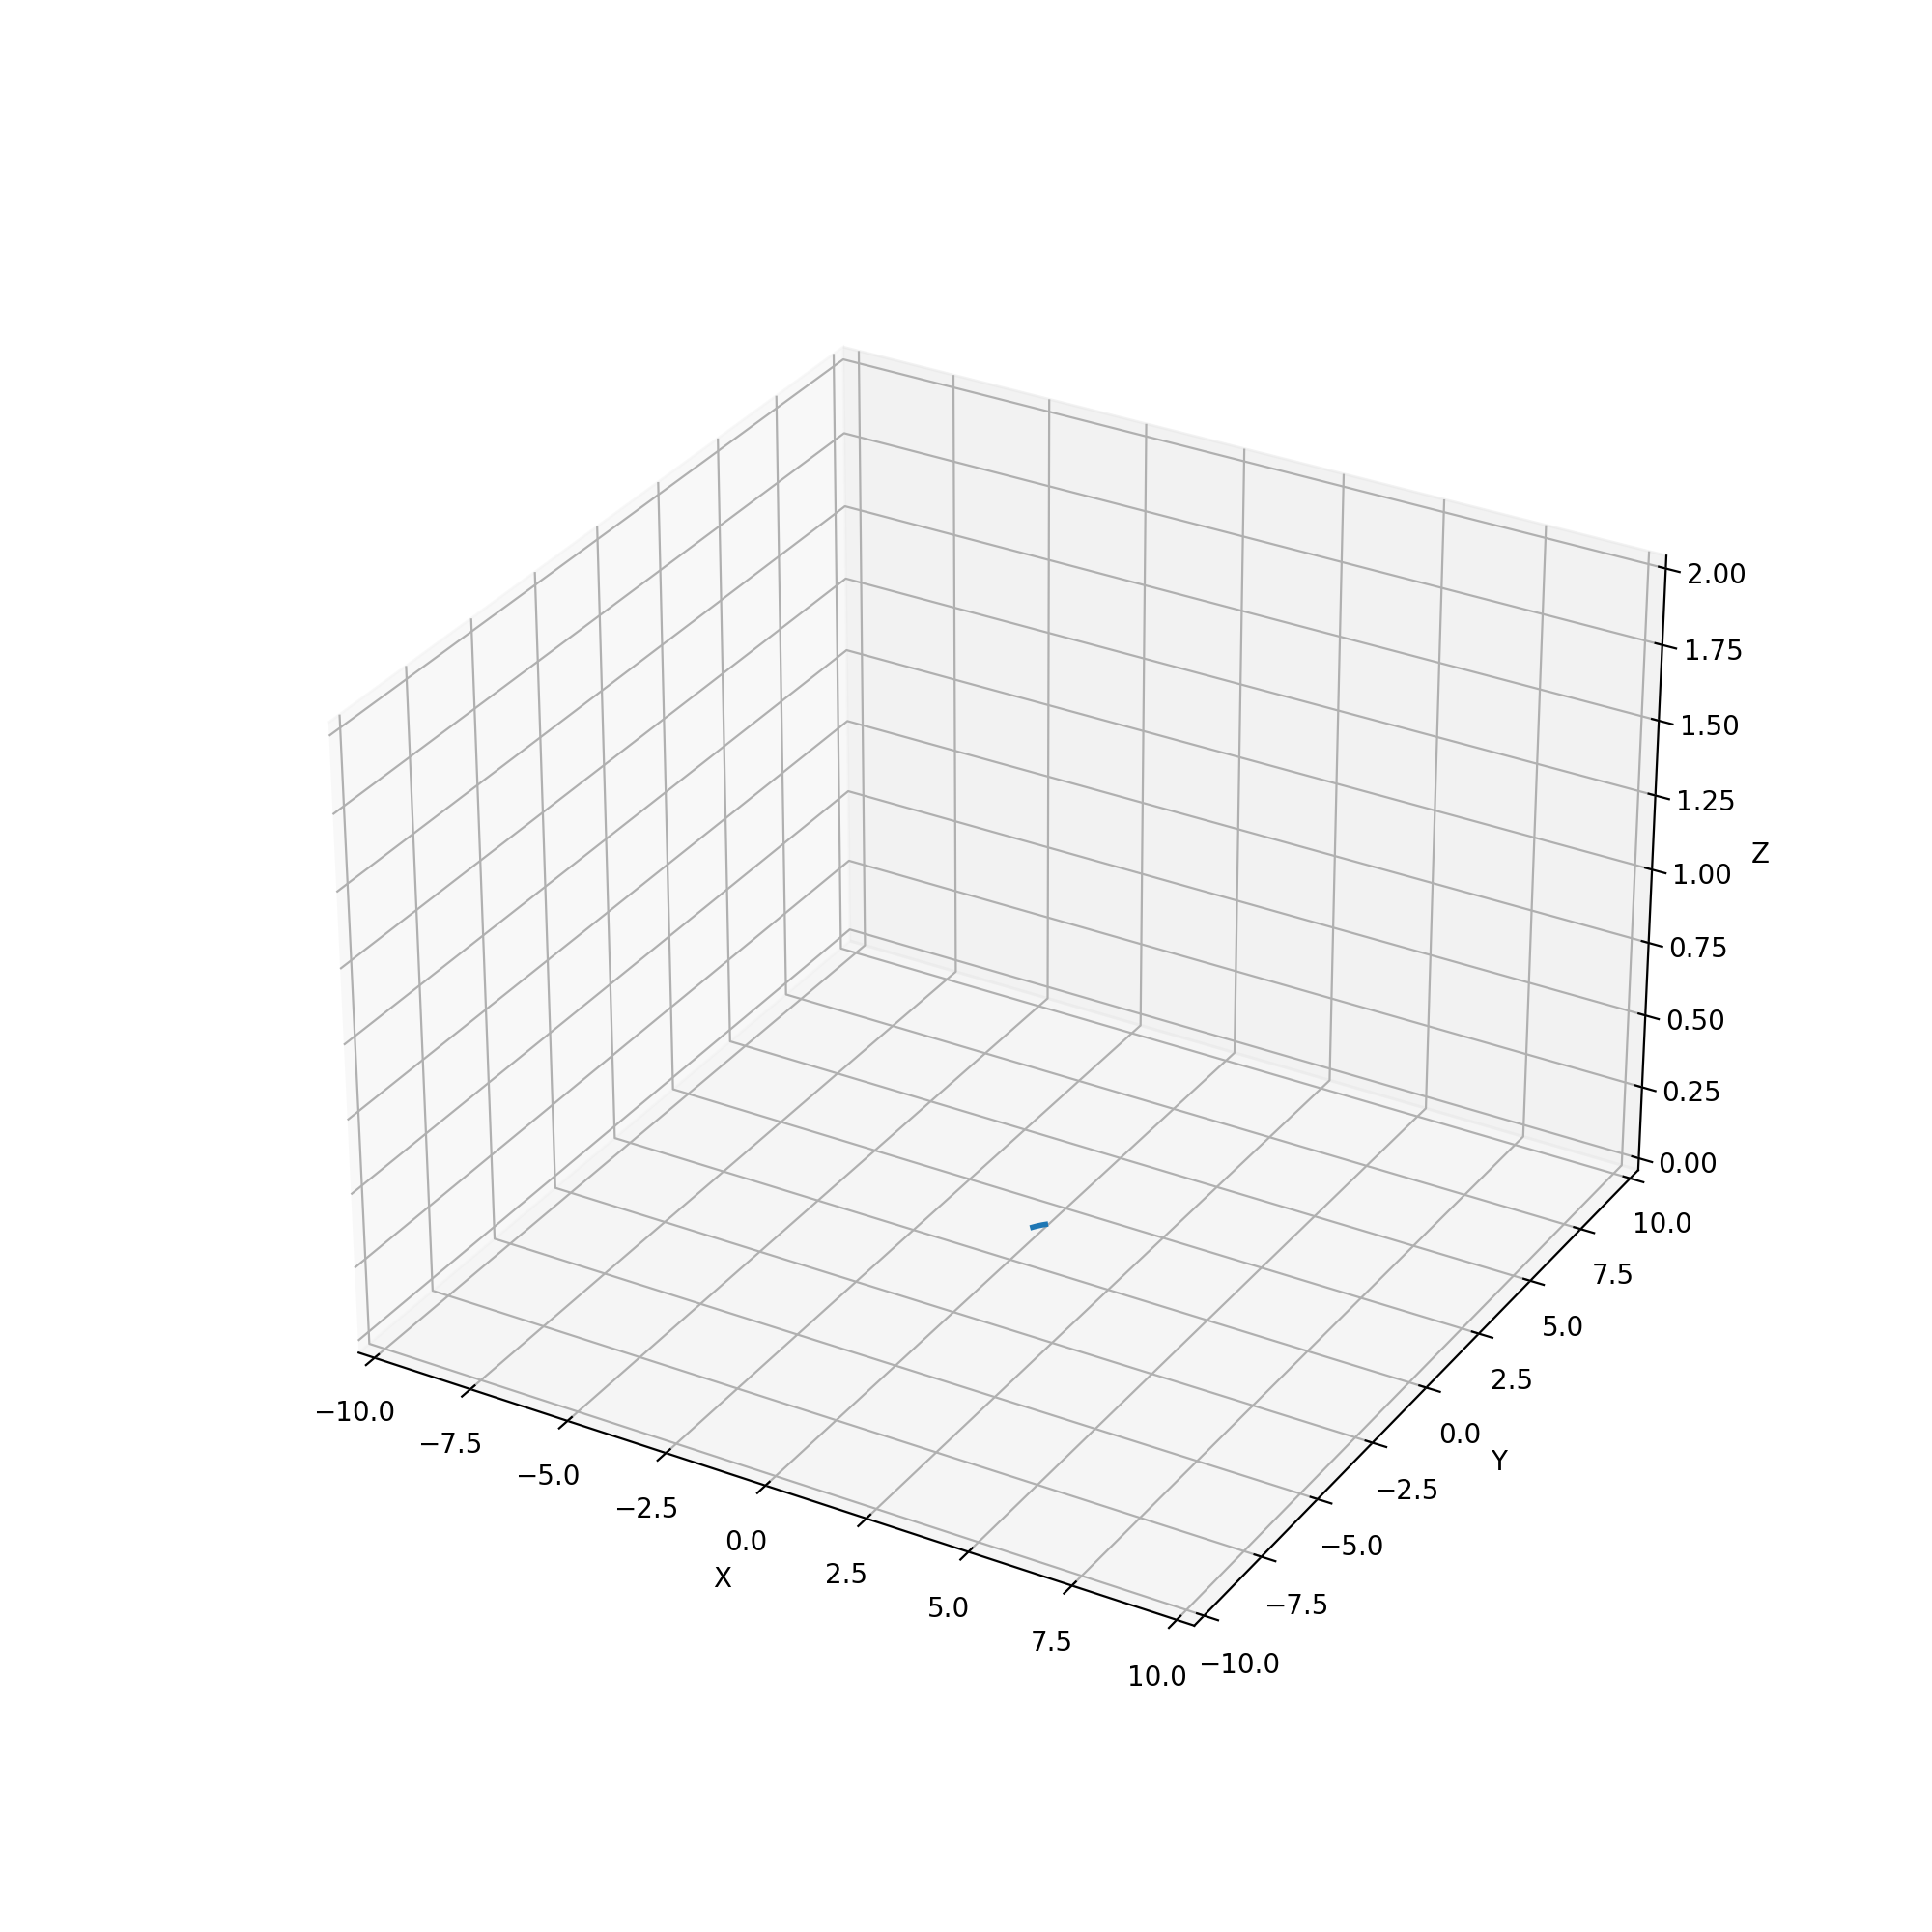

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define the parameters for the spiral trajectory
theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, 1000)
z = np.linspace(0, 2, 1000)
r = z**2 + 1

# Define the x and y coordinates for the spiral trajectory
x = r * np.sin(theta)
y = r * np.cos(theta)

# Create the Line3D object for the spiral trajectory
line = ax.plot([], [], [], linewidth=2)[0]

# Define the initialization function for the animation
def init():
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([0, 2])
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

# Define the update function for the animation
def update(frame):
    line.set_data(x[:frame], y[:frame])
    line.set_3d_properties(z[:frame])
    return line,

# Create the animation object
anim = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True)

# Show the animation
plt.show()


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define the parameters for the spiral trajectory
theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, 1000)
z = np.linspace(0, 2, 1000)
r = z**2 + 1

# Define the x and y coordinates for the spiral trajectory
x = r * np.sin(theta)
y = r * np.cos(theta)

# Define the initialization function for the animation
def init():
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([0, 2])
    return ax.plot([], [], [], linewidth=2)

# Define the update function for the animation
def update(frame):
    line[0].set_data(x[:frame], y[:frame])
    line[0].set_3d_properties(z[:frame])
    return line

# Create the animation object
line = ax.plot([], [], [], linewidth=2)
anim = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True)

# Show the animation
plt.show()


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define the parameters for the spiral trajectory
theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, 1000)
z = np.linspace(0, 2, 1000)
r = z**2 + 1

# Define the x and y coordinates for the spiral trajectory
x = r * np.sin(theta)
y = r * np.cos(theta)

# Plot the spiral trajectory
ax.plot(x, y, z, linewidth=2)

# Set the labels and limits for the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 2])

# Show the plot
plt.show()


In [ ]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
plt.show()

# copied from https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math

import os
import glob
import shutil

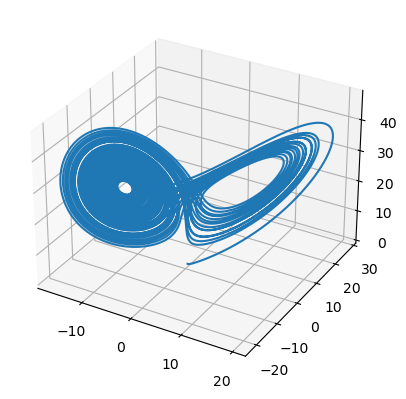

In [6]:
'''
This is JY's code for the Lorenz Attractor,
copied over from my learning portfolio.
'''

# constants
s = 10
b = 8 / 3
p = 28

# time
time = 0
max_time = 50
dt = 0.0001 # change this when needed

# variables
x = 0
y = 1
z = 0
data = []

def xt(x, y):
    return s * (y - x) * dt

def yt(x, y, z):
    return (x * (p - z) - y) * dt

def zt(x, y, z):
    return ((x * y) - (b * z)) * dt

while time < max_time:
    data.append([x, y, z])
    x = x + xt(x, y)
    y = y + yt(x, y, z)
    z = z + zt(x, y, z)
    time += dt

data = np.array(data)
data = {
    'x': data[:, 0],
    'y': data[:, 1],
    'z': data[:, 2],
}

ax = plt.axes(projection='3d')
ax.plot3D(data['x'], data['y'], data['z'])
plt.show()

### Numerical Schemes for Particle Movement

To accurately simulate the movement of a particle in three dimensions, we require the following information about the particle:
1. Position of the particle (3D coordinates)
2. Direction in which the particle is moving (3D vector)
3. Velocity of the particle (number)
4. Acceleration of the particle (number)

With these figures, we can tell where a particle is, where the particle is going, and how fast it will go there. Before simulating the movement of a particle in three dimensions, we begin by simulating the motion of a particle in one dimension.

**Disclaimer (JY): I will be making heavy use of ChatGPT to generate code, since it can write the code faster than I can.**

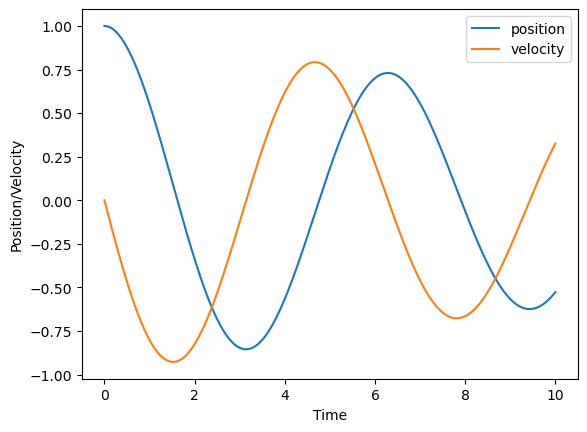

In [7]:
'''
This block is from ChatGPT. Prompt:
"Write some Python code to simulate the
damped harmonic movement of a particle
in one dimension"
'''

# Constants
m = 1.0     # mass of the particle
k = 1.0     # spring constant
b = 0.1     # damping coefficient

# Initial conditions
x0 = 1.0    # initial position
v0 = 0.0    # initial velocity

# Time parameters
t0 = 0.0    # initial time
tf = 10.0   # final time
dt = 0.01   # time step

# Arrays to store the results
t = np.arange(t0, tf+dt, dt)
x = np.zeros_like(t)
v = np.zeros_like(t)

# Euler-Cromer method
x[0] = x0
v[0] = v0
for i in range(1, len(t)):
    a = -k*x[i-1]/m - b*v[i-1]/m
    v[i] = v[i-1] + a*dt
    x[i] = x[i-1] + v[i]*dt

# Plot the results
plt.plot(t, x, label='position')
plt.plot(t, v, label='velocity')
plt.xlabel('Time')
plt.ylabel('Position/Velocity')
plt.legend()
plt.show()


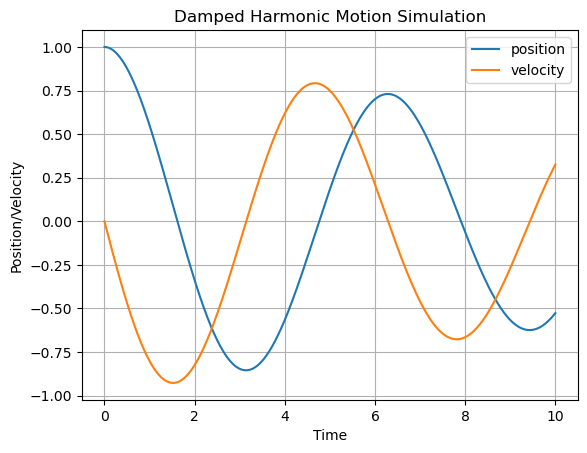

In [8]:
'''
This block is from ChatGPT, building upon
the block directly above this. Prompt:
"Can you make the plot look nicer?
Add grid lines and a figure title"
'''

# Constants
m = 1.0     # mass of the particle
k = 1.0     # spring constant
b = 0.1     # damping coefficient

# Initial conditions
x0 = 1.0    # initial position
v0 = 0.0    # initial velocity

# Time parameters
t0 = 0.0    # initial time
tf = 10.0   # final time
dt = 0.01   # time step

# Arrays to store the results
t = np.arange(t0, tf+dt, dt)
x = np.zeros_like(t)
v = np.zeros_like(t)

# Euler-Cromer method
x[0] = x0
v[0] = v0
for i in range(1, len(t)):
    a = -k*x[i-1]/m - b*v[i-1]/m
    v[i] = v[i-1] + a*dt
    x[i] = x[i-1] + v[i]*dt

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, x, label='position')
ax.plot(t, v, label='velocity')
ax.set_xlabel('Time')
ax.set_ylabel('Position/Velocity')
ax.set_title('Damped Harmonic Motion Simulation')
ax.legend()
ax.grid(True)
plt.show()


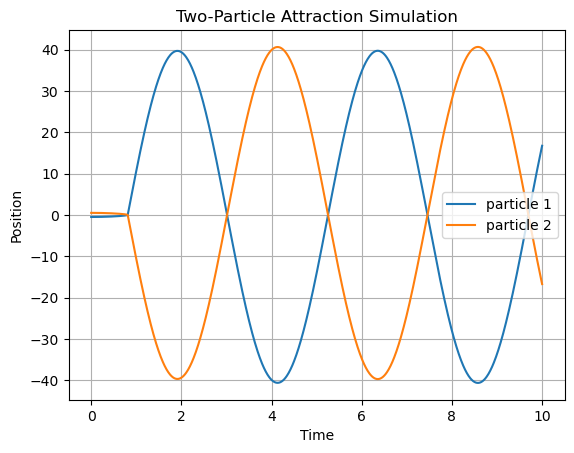

In [9]:
'''
This block is from ChatGPT, building upon
the block directly above this. Prompt:
"Now write some code for the movement
of two particles in one dimension,
simulating the forces of attraction
between them"
'''

# Constants
m = 1.0    # mass of the particles
k = 1.0    # spring constant
L = 1.0    # natural length of the spring
G = 1.0    # gravitational constant

# Initial conditions
x1 = -0.5  # initial position of particle 1
v1 = 0.0   # initial velocity of particle 1
x2 = 0.5   # initial position of particle 2
v2 = 0.0   # initial velocity of particle 2

# Time parameters
t0 = 0.0   # initial time
tf = 10.0  # final time
dt = 0.01  # time step

# Arrays to store the results
t = np.arange(t0, tf+dt, dt)
x1_array = np.zeros_like(t)
v1_array = np.zeros_like(t)
x2_array = np.zeros_like(t)
v2_array = np.zeros_like(t)

# Euler method
x1_array[0] = x1
v1_array[0] = v1
x2_array[0] = x2
v2_array[0] = v2
for i in range(1, len(t)):
    # Calculate the forces on the particles
    F12 = -k*(x2_array[i-1] - x1_array[i-1] - L) - G*m**2/(x2_array[i-1] - x1_array[i-1])**2
    F21 = -F12
    # Update the velocities of the particles
    v1_array[i] = v1_array[i-1] + F21/m*dt
    v2_array[i] = v2_array[i-1] + F12/m*dt
    # Update the positions of the particles
    x1_array[i] = x1_array[i-1] + v1_array[i]*dt
    x2_array[i] = x2_array[i-1] + v2_array[i]*dt

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, x1_array, label='particle 1')
ax.plot(t, x2_array, label='particle 2')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_title('Two-Particle Attraction Simulation')
ax.legend()
ax.grid(True)
plt.show()


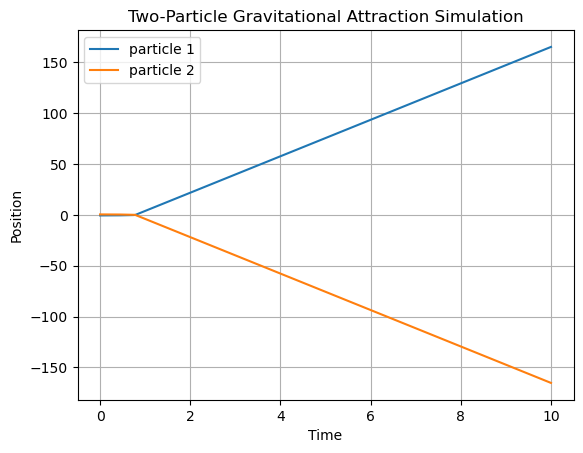

In [10]:
'''
This block is from ChatGPT, building upon
the block directly above this. Prompt:
"Rewrite that, but don't connect the
particles with a spring. The only force
acting on them both is gravitational
attraction"
'''

# Constants
m = 1.0    # mass of the particles
G = 1.0    # gravitational constant

# Initial conditions
x1 = -0.5  # initial position of particle 1
v1 = 0.0   # initial velocity of particle 1
x2 = 0.5   # initial position of particle 2
v2 = 0.0   # initial velocity of particle 2

# Time parameters
t0 = 0.0   # initial time
tf = 10.0  # final time
dt = 0.01  # time step

# Arrays to store the results
t = np.arange(t0, tf+dt, dt)
x1_array = np.zeros_like(t)
v1_array = np.zeros_like(t)
x2_array = np.zeros_like(t)
v2_array = np.zeros_like(t)

# Euler method
x1_array[0] = x1
v1_array[0] = v1
x2_array[0] = x2
v2_array[0] = v2
for i in range(1, len(t)):
    # Calculate the forces on the particles
    F12 = -G*m**2/(x2_array[i-1] - x1_array[i-1])**2
    F21 = -F12
    # Update the velocities of the particles
    v1_array[i] = v1_array[i-1] + F21/m*dt
    v2_array[i] = v2_array[i-1] + F12/m*dt
    # Update the positions of the particles
    x1_array[i] = x1_array[i-1] + v1_array[i]*dt
    x2_array[i] = x2_array[i-1] + v2_array[i]*dt

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, x1_array, label='particle 1')
ax.plot(t, x2_array, label='particle 2')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_title('Two-Particle Gravitational Attraction Simulation')
ax.legend()
ax.grid(True)
plt.show()


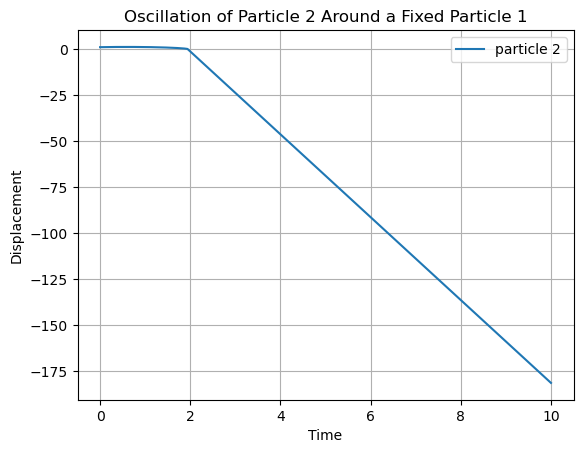

In [11]:
'''
This block is from ChatGPT, building upon
the block directly above this. Prompt:
"Let's try the two-particle system again.
This time, fix the displacement of one
particle, and plot the oscillation of the
other particle around the first"
'''

import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1.0    # mass of the particles
G = 1.0    # gravitational constant

# Initial conditions
x1 = 0.0   # initial position of particle 1
v1 = 0.0   # initial velocity of particle 1
x2 = 1.0   # initial position of particle 2
v2 = 0.5   # initial velocity of particle 2

# Time parameters
t0 = 0.0   # initial time
tf = 10.0  # final time
dt = 0.01  # time step

# Arrays to store the results
t = np.arange(t0, tf+dt, dt)
x1_array = np.zeros_like(t)
v1_array = np.zeros_like(t)
x2_array = np.zeros_like(t)
v2_array = np.zeros_like(t)

# Euler method
x1_array[0] = x1
v1_array[0] = v1
x2_array[0] = x2
v2_array[0] = v2
for i in range(1, len(t)):
    # Calculate the forces on the particles
    F12 = -G*m**2/(x2_array[i-1] - x1_array[i-1])**2
    F21 = -F12
    # Update the velocities of the particles
    v1_array[i] = v1_array[i-1] + F21/m*dt
    v2_array[i] = v2_array[i-1] + F12/m*dt
    # Update the positions of the particles
    x1_array[i] = x1_array[i-1] + v1_array[i]*dt
    x2_array[i] = x2_array[i-1] + v2_array[i]*dt
    # Fix the position of particle 1
    x1_array[i] = x1

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, x2_array - x1, label='particle 2')
ax.set_xlabel('Time')
ax.set_ylabel('Displacement')
ax.set_title('Oscillation of Particle 2 Around a Fixed Particle 1')
ax.legend()
ax.grid(True)
plt.show()


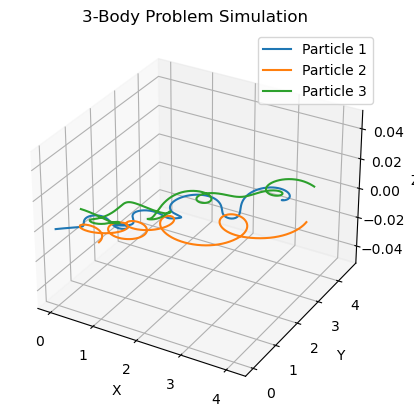

In [13]:
'''
This block is from ChatGPT. Prompt:
"Write some code to simulate the
3-body problem"
'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
m1 = 1.0    # mass of particle 1
m2 = 1.0    # mass of particle 2
m3 = 1.0    # mass of particle 3
G = 1.0    # gravitational constant

# Initial conditions
r1 = np.array([0.0, 0.0, 0.0])    # initial position of particle 1
v1 = np.array([0.0, 0.0, 0.0])    # initial velocity of particle 1
r2 = np.array([1.0, 0.0, 0.0])    # initial position of particle 2
v2 = np.array([0.0, 1.0, 0.0])    # initial velocity of particle 2
r3 = np.array([0.0, 1.0, 0.0])    # initial position of particle 3
v3 = np.array([1.0, 0.0, 0.0])    # initial velocity of particle 3

# Time parameters
t0 = 0.0    # initial time
tf = 10.0    # final time
dt = 0.01    # time step

# Arrays to store the results
t = np.arange(t0, tf+dt, dt)
r1_array = np.zeros((len(t), 3))
v1_array = np.zeros((len(t), 3))
r2_array = np.zeros((len(t), 3))
v2_array = np.zeros((len(t), 3))
r3_array = np.zeros((len(t), 3))
v3_array = np.zeros((len(t), 3))

# Euler method
r1_array[0] = r1
v1_array[0] = v1
r2_array[0] = r2
v2_array[0] = v2
r3_array[0] = r3
v3_array[0] = v3
for i in range(1, len(t)):
    # Calculate the forces on the particles
    r12 = r2_array[i-1] - r1_array[i-1]
    r13 = r3_array[i-1] - r1_array[i-1]
    r23 = r3_array[i-1] - r2_array[i-1]
    F12 = G*m1*m2*r12/np.linalg.norm(r12)**3 + G*m1*m2*r23/np.linalg.norm(r23)**3
    F13 = G*m1*m3*r13/np.linalg.norm(r13)**3 - G*m1*m2*r23/np.linalg.norm(r23)**3
    F23 = G*m2*m3*r23/np.linalg.norm(r23)**3 - G*m1*m2*r12/np.linalg.norm(r12)**3
    # Update the velocities of the particles
    v1_array[i] = v1_array[i-1] + (F12+F13)/m1*dt
    v2_array[i] = v2_array[i-1] + (-F12+F23)/m2*dt
    v3_array[i] = v3_array[i-1] + (-F13-F23)/m3*dt
    # Update the positions of the particles
    r1_array[i] = r1_array[i-1] + v1_array[i]*dt
    r2_array[i] = r2_array[i-1] + v2_array[i]*dt
    r3_array[i] = r3_array[i-1] + v3_array[i]*dt

# Plot the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r1_array[:,0], r1_array[:,1], r1_array[:,2], label='Particle 1')
ax.plot(r2_array[:,0], r2_array[:,1], r2_array[:,2], label='Particle 2')
ax.plot(r3_array[:,0], r3_array[:,1], r3_array[:,2], label='Particle 3')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3-Body Problem Simulation')
ax.legend()
plt.show()

In [14]:
'''
This block is from ChatGPT, building upon
the block directly above this. Prompt:
"Could you now generate the code for
a 10-body problem?"
'''

def simulate(n_bodies, m, r, v, t_max, dt):
    # Define constants
    G = 6.67430e-11

    # Create arrays to store the position and velocity of each particle at each time step
    n_steps = int(t_max/dt) + 1
    r_array = np.zeros((n_steps, n_bodies, 3))
    v_array = np.zeros((n_steps, n_bodies, 3))

    # Set initial values of position and velocity arrays
    r_array[0] = r
    v_array[0] = v

    # Define acceleration function
    def acceleration(r, m):
        n = len(m)
        a = np.zeros((n, 3))
        for i in range(n):
            for j in range(n):
                if i != j:
                    rij = r[j] - r[i]
                    a[i] += G*m[j]*rij/np.linalg.norm(rij)**3
        return a

    # Define Euler step function
    def euler_step(r, v, a, dt):
        r_new = r + v*dt
        v_new = v + a*dt
        return r_new, v_new

    # Perform simulation
    for i in range(n_steps-1):
        a = acceleration(r_array[i], m)
        for j in range(n_bodies):
            r_new, v_new = euler_step(r_array[i,j], v_array[i,j], a[j], dt)
            r_array[i+1,j] = r_new
            v_array[i+1,j] = v_new

    return r_array, v_array



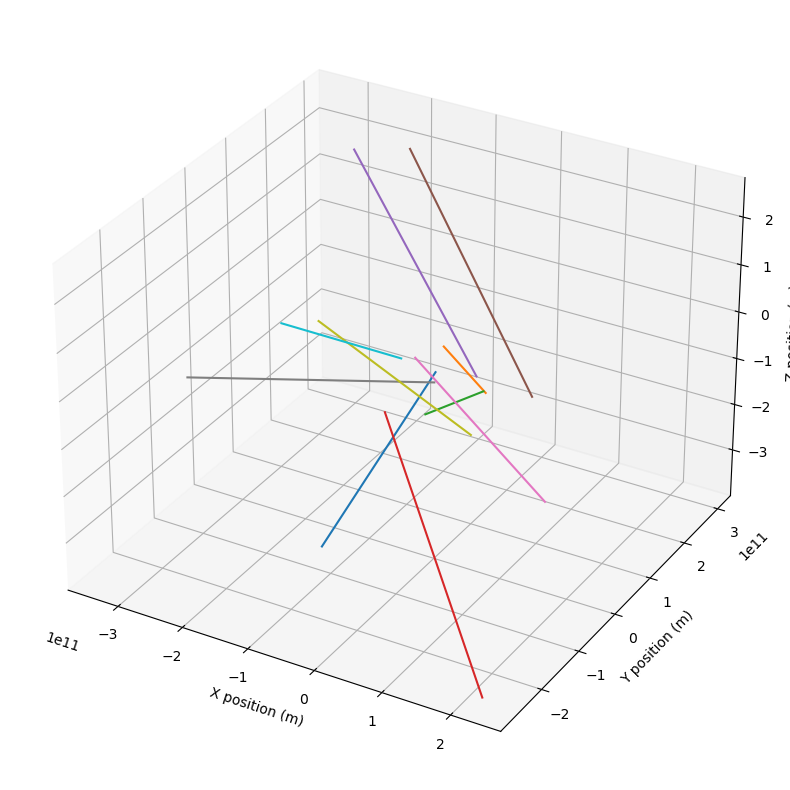

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n_bodies = 10
m = np.random.uniform(1e10, 1e11, n_bodies)
r = np.random.uniform(-1e11, 1e11, (n_bodies, 3))
v = np.random.uniform(-1e3, 1e3, (n_bodies, 3))
t_max = 3600*24*365*10  # 10 years in seconds
dt = 3600*24*7  # 1 week in seconds

# Simulate motion of particles
r_array, v_array = simulate(n_bodies, m, r, v, t_max, dt)

# Plot trajectories
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X position (m)')
ax.set_ylabel('Y position (m)')
ax.set_zlabel('Z position (m)')

for i in range(n_bodies):
    ax.plot(r_array[:,i,0], r_array[:,i,1], r_array[:,i,2])

plt.show()
